<a href="https://colab.research.google.com/github/alwisnbri/Chapter_01/blob/main/Copy_of_Coding_ANN_new_94__(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
!pip install mlxtend

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import StandardScaler
import nbformat

In [3]:
# Load the dataset
data_path = '/content/penyakit jantung 1000+.csv'  # Ganti dengan path dataset Anda
data = pd.read_csv(data_path)
# Display the first few rows of the dataset to understand its structure
data.head()

,age;sex;cp;trestbps;chol;fbs;restecg;thalach;exang;oldpeak;slope;ca;thal;target
0,52;1;0;125;212;0;1;168;0;1;2;2;3;0
1,53;1;0;140;203;1;0;155;1;3.1;0;0;3;0
2,70;1;0;145;174;0;1;125;1;2.6;0;0;3;0
3,61;1;0;148;203;0;1;161;0;0;2;1;3;0
4,62;0;0;138;294;1;1;106;0;1.9;1;3;2;0


#Menghapus Titik Koma Pada Data

In [4]:
# Reload the dataset with the correct delimiter (semicolon)
data = pd.read_csv(data_path, delimiter=';')
# Display the first few rows to verify
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


#memberikan gambaran tentang distribusi kelas dalam data
#1 = pria
#0 = wanita

In [6]:
data.target.value_counts()

,count
target,
1,526
0,499


# memberikan gambaran umum tentang distribusi dan karakteristik dari nilai-nilai dalam kolom target

In [7]:
data.target.describe()

,target
count,1025.000000
mean,0.513171
std,0.500070
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


<Axes: xlabel='target'>

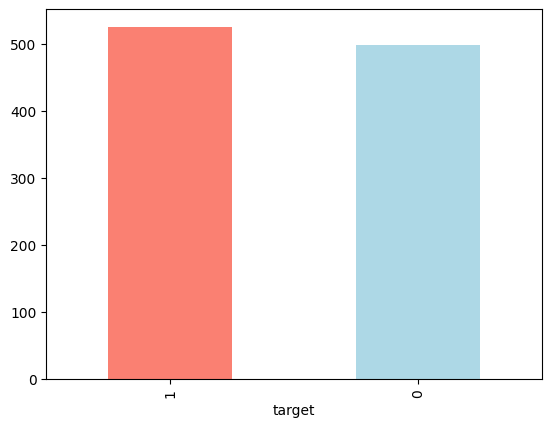

In [8]:
data.target.value_counts().plot(kind="bar",color=["salmon","lightblue"])

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [10]:
data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [11]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#Frekuensi penyakit jantung menurut jenis kelamin

In [12]:
data.sex.value_counts() # 1=male, 0=female

,count
sex,
1,713
0,312


In [13]:
# Compare target column to sex column
pd.crosstab(data.target, data.sex)

sex,0,1
target,,
0,86,413
1,226,300


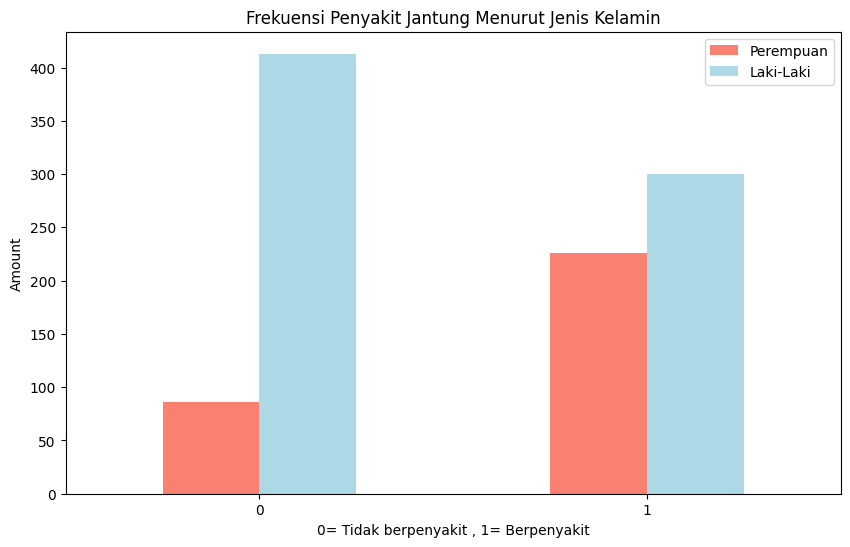

In [14]:
pd.crosstab(data.target, data.sex).plot(kind="bar",
                                   figsize=(10,6),
                                   color = ["salmon","lightblue"])

plt.title("Frekuensi Penyakit Jantung Menurut Jenis Kelamin")
plt.xlabel("0= Tidak berpenyakit , 1= Berpenyakit")
plt.ylabel("Amount")
plt.legend(["Perempuan", "Laki-Laki"])

plt.xticks(rotation=0);

In [15]:
# Age vs max heart rate
data.thalach.value_counts() # thalach=maximum heartrate achieved

,count
thalach,
162,35
160,31
163,29
173,28
152,28
...,...
194,3
185,3
106,3


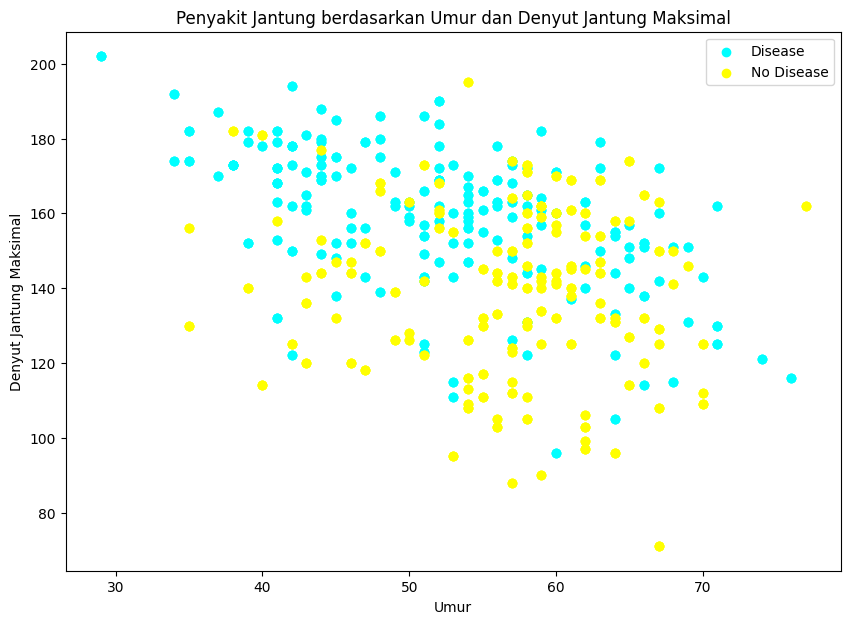

In [16]:
plt.figure(figsize=(10,7))

# Scatter with positive examples
plt.scatter([data.age[data.target==1]], [data.thalach[data.target==1]], c ="aqua")
#Scatter with negative examples
plt.scatter([data.age[data.target==0]], [data.thalach[data.target==0]], c = "yellow")

plt.title("Penyakit Jantung berdasarkan Umur dan Denyut Jantung Maksimal")
plt.xlabel("Umur")
plt.ylabel("Denyut Jantung Maksimal")
plt.legend(["Disease", "No Disease"]);

<Axes: ylabel='Frequency'>

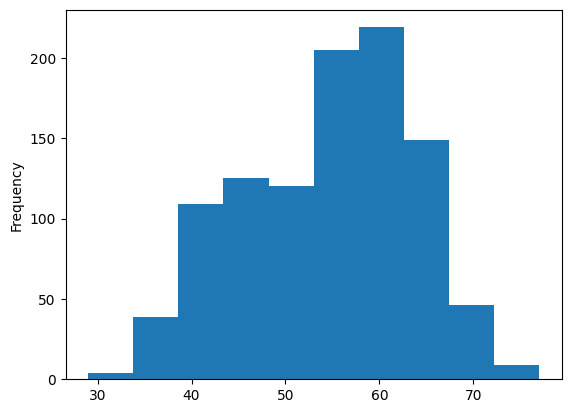

In [17]:
data.age.plot.hist()

In [18]:
pd.crosstab(data.cp, data.target)

target,0,1
cp,,
0,375,122
1,33,134
2,65,219
3,26,51


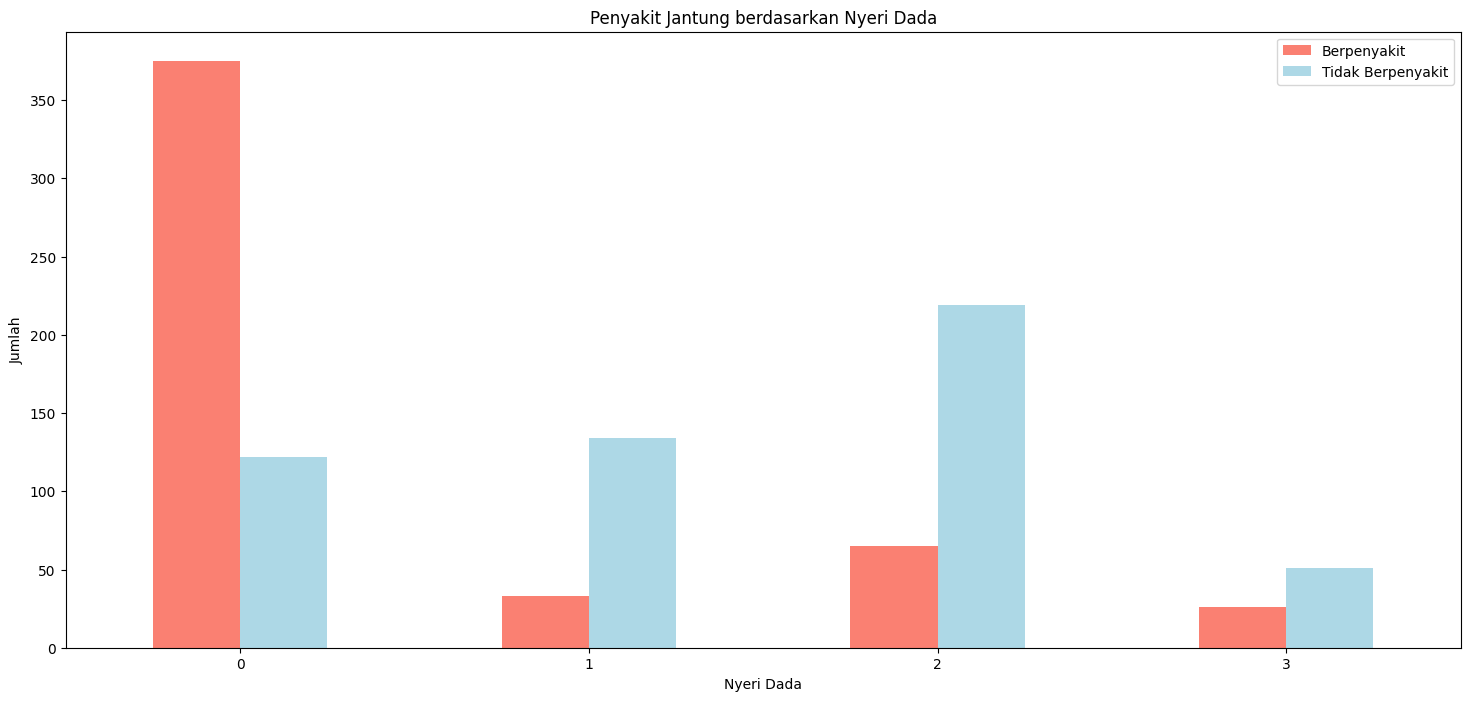

In [19]:
pd.crosstab(data.cp,data.target).plot(kind="bar",
                                 figsize=(18,8),
                                 color=["salmon","lightblue"])
plt.title("Penyakit Jantung berdasarkan Nyeri Dada")
plt.xlabel("Nyeri Dada")
plt.ylabel("Jumlah")
plt.legend(["Berpenyakit", "Tidak Berpenyakit"])
plt.xticks(rotation=0);

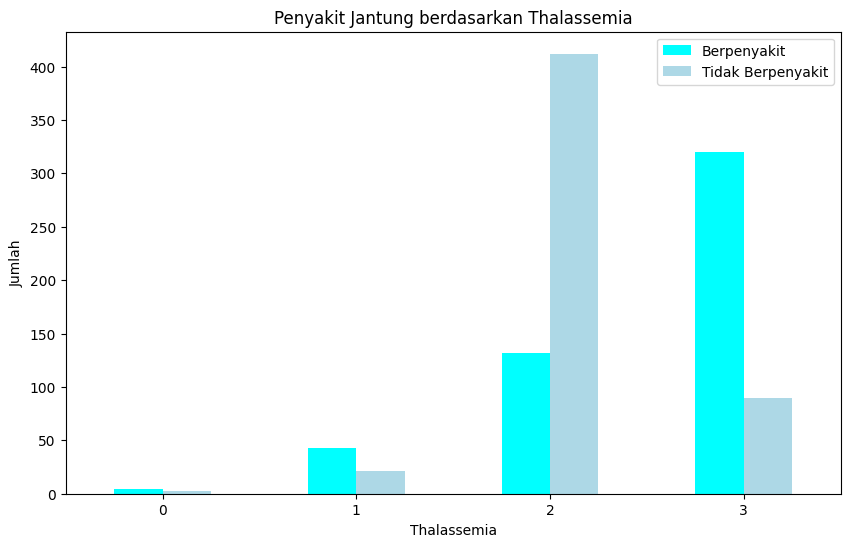

In [20]:
pd.crosstab(data.thal,data.target).plot(kind="bar",
                                 figsize=(10,6),
                                 color=["aqua", "lightblue"])


plt.title("Penyakit Jantung berdasarkan Thalassemia")
plt.xlabel("Thalassemia")
plt.ylabel("Jumlah")
plt.legend(["Berpenyakit", "Tidak Berpenyakit"])
plt.xticks(rotation=0);

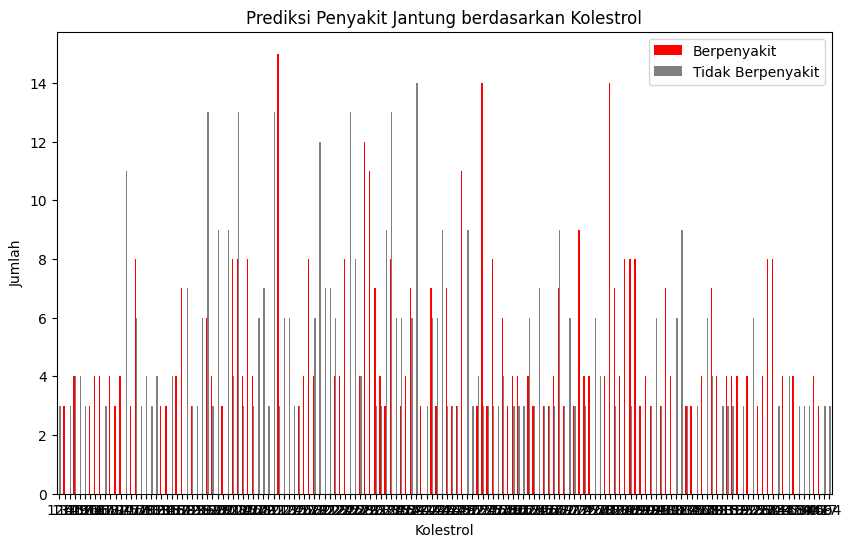

In [21]:
pd.crosstab(data.chol,data.target).plot(kind="bar",
                                 figsize=(10,6),
                                 color=["red", "grey"])


plt.title("Prediksi Penyakit Jantung berdasarkan Kolestrol")
plt.xlabel("Kolestrol")
plt.ylabel("Jumlah")
plt.legend(["Berpenyakit", "Tidak Berpenyakit"])
plt.xticks(rotation=0);

In [22]:
# Make a corealation matrix(how independent column interarct with each other)
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


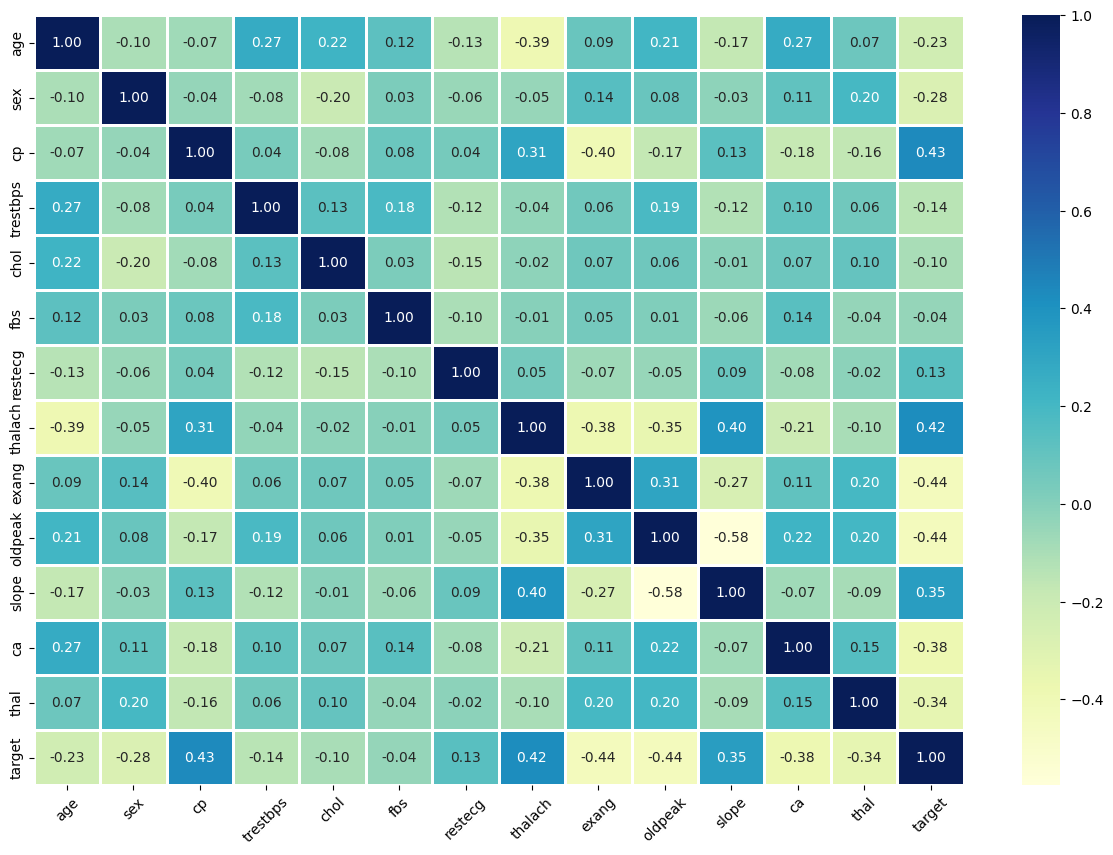

In [23]:
try:
    heat_map = plt.subplots(figsize=(15,10))
    heat_map = sns.heatmap(data.corr(method='pearson'), annot=True, fmt='.2f', linewidths=2, cmap = "YlGnBu")
    heat_map.set_xticklabels(heat_map.get_xticklabels(), rotation=45)
except ValueError:
    pass
plt.show()

In [24]:
for i in data.columns:
    print(i,len(data[i].unique()))

age 41
sex 2
cp 4
trestbps 49
chol 152
fbs 2
restecg 3
thalach 91
exang 2
oldpeak 40
slope 3
ca 5
thal 4
target 2


#Modelling
# Mengumpulkan Kolom dan Memisahkan Data

In [25]:
# Create X and y
X = data.drop("target", axis=1)
y= data["target"]

# Scale the features using StandardScaler
scaler = StandardScaler() # Create a StandardScaler object
X_scaled = scaler.fit_transform(X) # Fit and transform the data

# Split fata into train and ttest
np.random.seed(42)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#Normalization MIN MAX

In [26]:
# Normalize the features using Min-Max scaling
# Applying Min-Max Normalization
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

#menginisialisasi model klasifikasi berbasis jaringan saraf yang akan digunakan dalam proses pemilihan fitur secara ekstensif (exhaustive feature selection)

In [27]:
# Exhaustive Feature Selection
# Initialize the neural network model for feature selection
mlp = MLPClassifier(random_state=42, max_iter=1000, early_stopping=True)

#menginisialisasi pemilihan fitur secara ekstensif (Exhaustive Feature Selection) dengan menggunakan Exhaustive Feature Selector (EFS)

In [28]:
# Initialize Exhaustive Feature Selector
efs = EFS(mlp,
          min_features=3,
          max_features=4,
          scoring='accuracy',
          print_progress=True,
          cv=4)

In [30]:
# Perform exhaustive feature selection
efs = efs.fit(X_scaled, y)
best_features = list(efs.best_idx_)
print("Best features selected by EFS: ", best_features)

Features: 1001/1001

Best features selected by EFS:  [2, 11, 12]


#membuat subset dari data fitur dengan hanya menggunakan fitur-fitur terbaik yang telah dipilih sebelumnya melalui proses pemilihan fitur

In [31]:
# Perbarui data hanya dengan fitur terbaik
X_train = X_train[:, best_features]
X_test = X_test[:, best_features]

#melatih model jaringan saraf (mlp) menggunakan dataset fitur yang telah dipilih dan dibagi menjadi data pelatihan

In [32]:
# Training a Neural Network model on the selected features
mlp.fit(X_train, y_train)

MLPClassifier(early_stopping=True, max_iter=1000, random_state=42)

#mengevaluasi kinerjanya dengan menghitung akurasi

In [33]:
# Making predictions and evaluating the model
y_pred = mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7463414634146341

# melihat jumlah data train dan test yang digunakan

In [34]:
X_train.shape

(820, 3)

In [35]:
X_test.shape

(205, 3)

In [36]:
y_train.shape

(820,)

In [37]:
y_test.shape

(205,)

## Bersih2 Outlier Pada Data

In [60]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
predictions = rf.predict(X_train)

# Cari label yang berbeda dari prediksi
noise_idx = np.where(predictions != y_train)[0]
print("Indeks dengan label noise:", noise_idx)
X_train_cleaned = np.delete(X_train, noise_idx, axis=0)
y_train_cleaned = np.delete(y_train, noise_idx, axis=0)

Indeks dengan label noise: [  3  11  13  16  27  28  34  52  64  73  88  99 102 111 113 140 143 169
 192 206 215 226 227 234 249 252 256 268 276 281 296 300 309 310 311 317
 318 319 340 350 355 391 398 403 406 409 411 423 426 427 428 442 455 464
 477 479 485 486 488 495 507 513 519 529 533 536 538 562 571 572 575 580
 582 584 592 593 594 596 618 626 643 646 653 654 676 677 681 687 689 692
 698 708 718 725 752 761 765 767 774 775 778 781 782 787 791 792 795 807
 812 814 818]


#Melatih model jaringan saraf tiruan (neural network) untuk klasifikasi biner

In [61]:
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow import keras

In [63]:
# model training
model = keras.Sequential([
    keras.layers.Dense(len(best_features), activation='relu'),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(6, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_history=model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.3096 - loss: 0.7300 - val_accuracy: 0.3841 - val_loss: 0.7075
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3406 - loss: 0.7137 - val_accuracy: 0.4634 - val_loss: 0.6892
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4410 - loss: 0.7050 - val_accuracy: 0.6829 - val_loss: 0.6754
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5909 - loss: 0.6841 - val_accuracy: 0.7073 - val_loss: 0.6632
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6860 - loss: 0.6710 - val_accuracy: 0.7317 - val_loss: 0.6533
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6999 - loss: 0.6586 - val_accuracy: 0.7256 - val_loss: 0.6425
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6786 - loss: 0.6540 - val_accuracy: 0.7256 - val_loss: 0.6323
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7168 - loss: 0.6370 - val_accuracy: 0.7256 - 

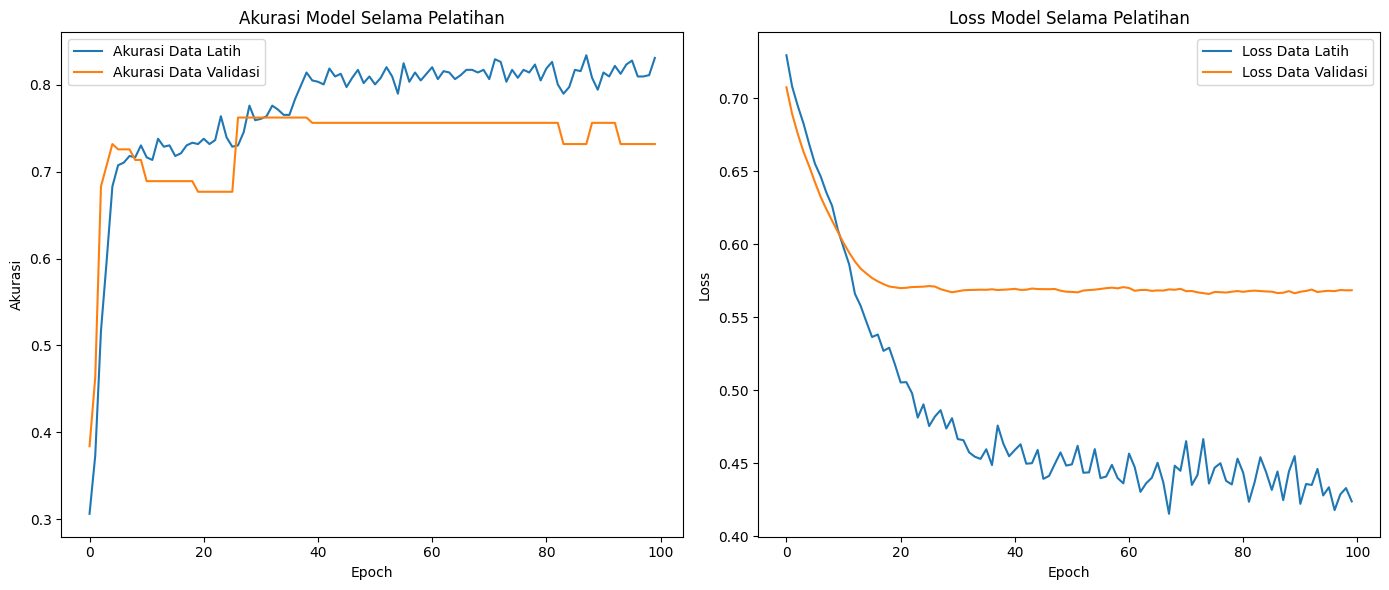

In [69]:
# Plot akurasi
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(model_history.history['accuracy'], label='Akurasi Data Latih') # Changed history to model_history
plt.plot(model_history.history['val_accuracy'], label='Akurasi Data Validasi') # Changed history to model_history
plt.title('Akurasi Model Selama Pelatihan')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(model_history.history['loss'], label='Loss Data Latih')
plt.plot(model_history.history['val_loss'], label='Loss Data Validasi')
plt.title('Loss Model Selama Pelatihan')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

#Mengonversi hasil prediksi probabilitas dari model menjadi prediksi biner (0 atau 1) dengan menggunakan ambang batas 0.5.

In [73]:
yp = model.predict(X_test)
# print(y_train[:10])
# print(yp[:10])
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


#Results and Metrics

#Menampilkan laporan evaluasi model berdasarkan hasil prediksi dan label

In [74]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.75      0.77       102
           1       0.77      0.81      0.79       103

    accuracy                           0.78       205
   macro avg       0.78      0.78      0.78       205
weighted avg       0.78      0.78      0.78       205



#Mengevaluasi kinerja model klasifikasi, yaitu classification_report dan accuracy_score

In [75]:
from sklearn.metrics import classification_report, accuracy_score

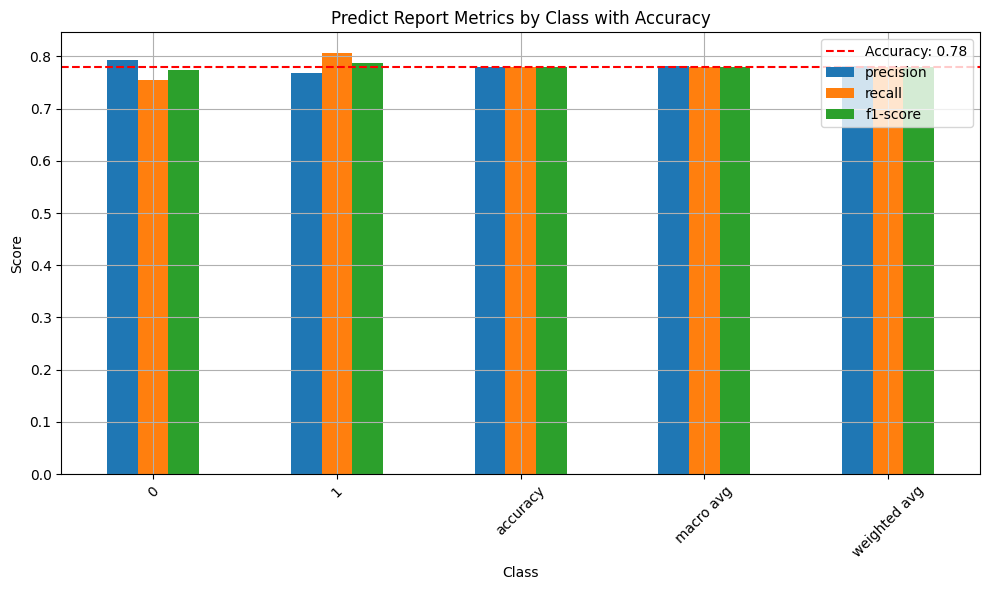

In [76]:
# Get classification report as a dictionary
report = classification_report(y_test, y_pred, output_dict=True)

# Calculate overall accuracy
accuracy = accuracy_score(y_test, y_pred)

# Convert the dictionary into a DataFrame for easy plotting
data_report = pd.DataFrame(report).transpose()

# Filter out support column (if not needed for the plot)
data_report = data_report.drop(columns=['support'])

# Create the plot for precision, recall, and F1-score
ax = data_report[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(10, 6))

# Plot accuracy as a horizontal line across all bars
plt.axhline(y=accuracy, color='red', linestyle='--', label=f'Accuracy: {accuracy:.2f}')

# Customize the plot
plt.title('Predict Report Metrics by Class with Accuracy')
plt.ylabel('Score')
plt.xlabel('Class')
plt.xticks(np.arange(len(data_report.index)), data_report.index, rotation=45)
plt.legend(loc='upper right')
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()

#Menghitung confusion matrix untuk melihat bagaimana model memprediksi data uji

tf.Tensor(
[[77 25]
 [20 83]], shape=(2, 2), dtype=int32)


Text(95.72222222222221, 0.5, 'Prediksi Penyakit, 0: Iya/1: Tidak')

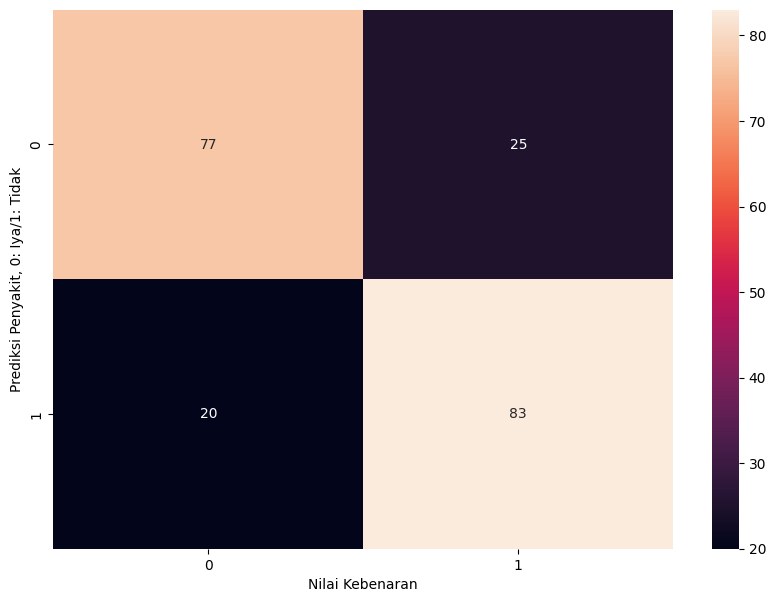

In [77]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

print(cm)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Nilai Kebenaran')
plt.ylabel('Prediksi Penyakit, 0: Iya/1: Tidak')